In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Fonction renvoyant n variables IDD de Bernouilli

In [2]:
def one_bernouilli(p: float):
    return (np.random.rand() < p) * 1.

def many_bernouilli(p: float, n: int) -> np.ndarray:
    return np.array([one_bernouilli(p) for i in range(n)])

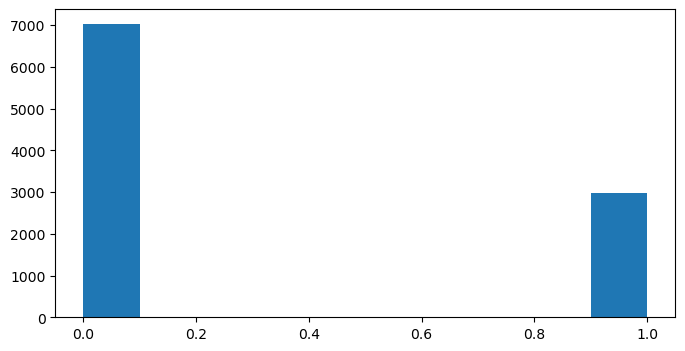

In [3]:
# small experiment:

p = 0.3
n = 10**4

Y = many_bernouilli(p, n)
plt.figure(figsize=(8,4))
plt.hist(Y);

## Fonction loi binomiale

theorithical_esperance : 1.5
empirical_mean :  1.5012


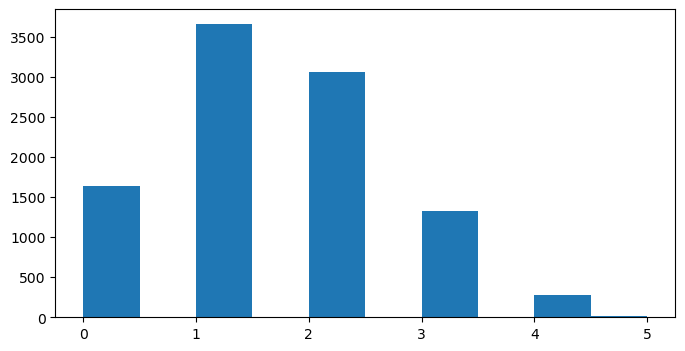

In [4]:
def binomiale(p, k):
    return many_bernouilli(p, k).sum()

def many_binomiale(p, k, n):
    binomiales = [binomiale(p,k) for i in range(n)]
    return np.array(binomiales)
    

# short experiment
p = 0.3
k = 5

theorithical_esperance = p * k

n = 10**4
Y = many_binomiale(p,k,n)
empirical_mean = Y.mean()


print("theorithical_esperance :", theorithical_esperance)
print("empirical_mean : ", empirical_mean)

plt.figure(figsize=(8,4))
plt.hist(Y, bins=10);

## Fonction loi géométrique

theorithical_esperance : 3.3333333333333335
empirical_mean :  3.364


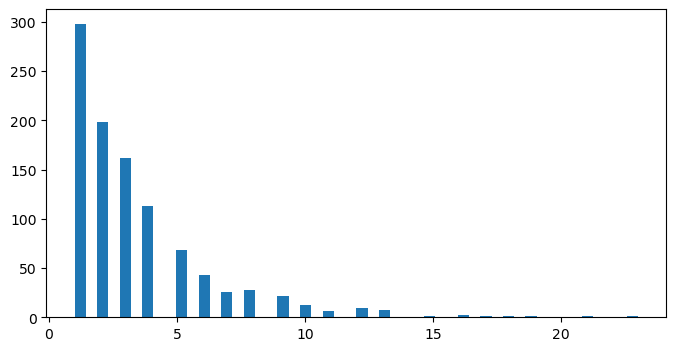

In [5]:
def one_geometrique(p):
    k = 1
    while not one_bernouilli(p):
        k += 1
    return k

def many_geometriques(p, n):
    return np.array([one_geometrique(p) for i in range(n)])

p = 0.3
n = 10**3

Y = many_geometriques(p, n)

theorithical_esperance = 1 / p
empirical_mean = Y.mean()

print("theorithical_esperance :", theorithical_esperance)
print("empirical_mean : ", empirical_mean)
    
plt.figure(figsize=(8,4))
plt.hist(Y, bins=50);

## Fonction loi de Poisson

theorithical_esperance : 12.0
empirical_mean :  12.005667


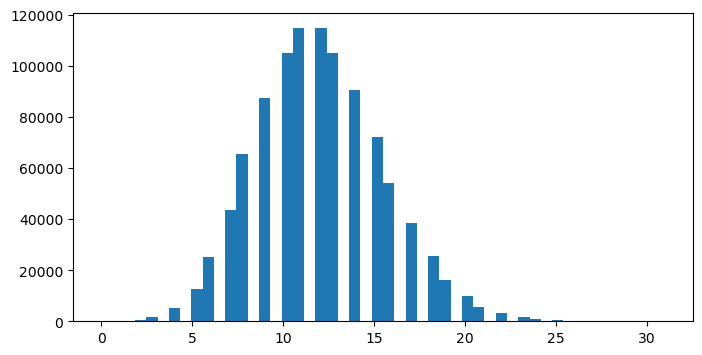

In [6]:
lam = 12.0
n = 10 ** 6
Y = np.random.poisson(lam, n)

empirical_mean = Y.mean()
print("theorithical_esperance :", lam)
print("empirical_mean : ", empirical_mean)

plt.figure(figsize=(8,4))
plt.hist(Y, bins=50);

## Fonction loi dernier exercice

theorithical_esperance : 415.0
empirical_mean :  416.04851


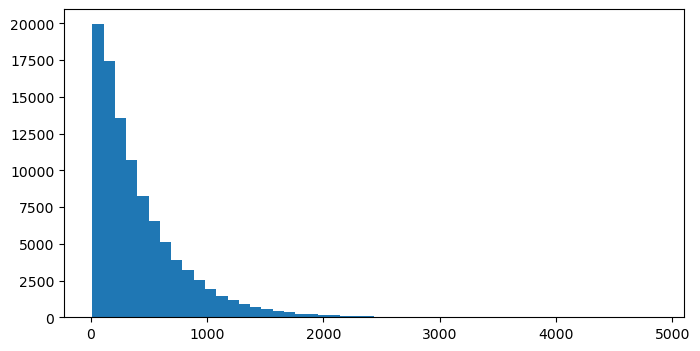

In [7]:
def one_random_var(mu: float, lam: float, p: float):
    X = one_geometrique(p)
    R = np.random.poisson(mu)
    T = R
    for i in range(X):
        T += np.random.poisson(lam)
    return T

def many_random_var(n:int, mu: float, lam: float, p: float):
    return np.array([one_random_var(mu, lam, p) for i in range(n)])

lam = 12.0
mu = 15
p = 0.03
n = 10 ** 5
Y = many_random_var(n, mu, lam, p)

empirical_mean = Y.mean()
theorithical_esperance = mu + (1 / p) * lam

print("theorithical_esperance :", theorithical_esperance)
print("empirical_mean : ", empirical_mean)

plt.figure(figsize=(8,4))
plt.hist(Y, bins=50);

## Etude vitesse de convergence vers la moyenne théorique

### Exemple avec la loi de Poisson

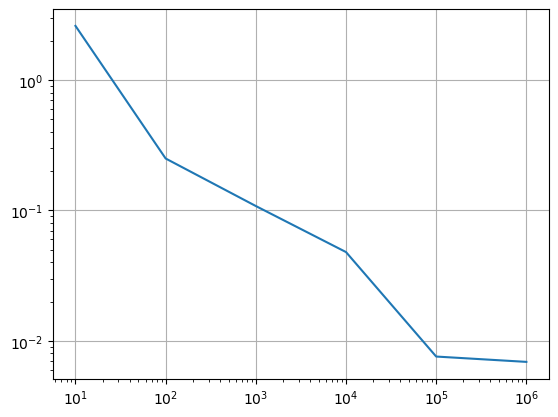

In [8]:
# P
Ns = [10**i for i in range(1, 7)]



ecart_moyenne_theorique = [
    abs(np.random.poisson(lam, n).mean() - lam) for n in Ns
]

plt.loglog()
plt.grid();
plt.plot(Ns, ecart_moyenne_theorique);

### Loi des écarts à la moyenne théorique : la loi normale !

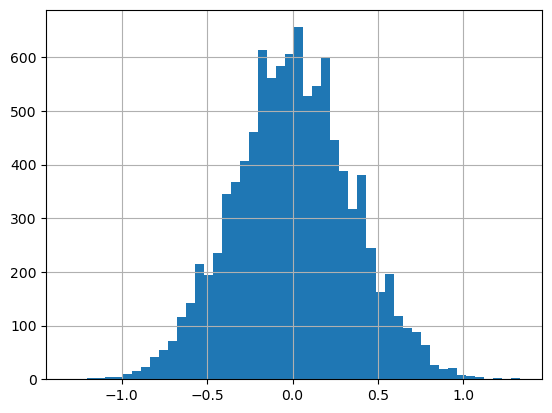

In [9]:
# P
N = 10 ** 2

n_ecarts = 10 ** 4

ecarts_moyenne_theorique = [
    np.random.poisson(lam, N).mean() - lam for i in range(n_ecarts)
]

plt.grid();
plt.hist(ecarts_moyenne_theorique, bins=50);